In [1]:
import pandas as pd
import numpy as np
df=pd.read_excel("lab4.xlsx")
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [9]:
import math
# Calculating the entropy of a target variable
def entropy(target_column):
    counts = target_column.value_counts()
    entropy = 0
    total = len(target_column)
    for count in counts:
        p = count / total
        entropy -= p * math.log2(p)
    return entropy
# Calculating the information gain for a feature
def information_gain(data, feature, target_column):
    unique_values = data[feature].unique()
    weighted_entropy = 0
    for value in unique_values:
        subset = data[data[feature] == value]
        weighted_entropy += len(subset) / len(data) * entropy(subset[target_column])
    return entropy(data[target_column]) - weighted_entropy
target_variable = 'buys_computer'
# Calculating the information gain for each feature
features = ['age', 'income', 'student', 'credit_rating']
information_gains = {feature: information_gain(df, feature, target_variable) for feature in features}
# Finding the feature with the highest information gain
root_node = max(information_gains, key=information_gains.get)
print("Information Gains:")
for feature, gain in information_gains.items():
    print(f"{feature}: {gain}")
print(f"The root node for the decision tree is: {root_node}")


Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949
The root node for the decision tree is: age


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [13]:
X = df.drop(columns='buys_computer')
y = df['buys_computer']
Tr_X, _, Tr_y, _ = train_test_split(X, y, test_size=0.1, random_state=42)  # Using the entire dataset as the training set
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

ValueError: could not convert string to float: '<=30'

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
X = df.drop(columns='buys_computer')
y = df['buys_computer']
Tr_X, _, Tr_y, _ = train_test_split(X, y, test_size=0.1, random_state=40)
encoder = OneHotEncoder()
Tr_X_encoded = encoder.fit_transform(Tr_X)
model = DecisionTreeClassifier()
model.fit(Tr_X_encoded, Tr_y)
training_accuracy = model.score(Tr_X_encoded, Tr_y)
print("Training Set Accuracy:", training_accuracy)
#Finding the depth of the decision tree
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)


Training Set Accuracy: 1.0
Tree Depth: 5


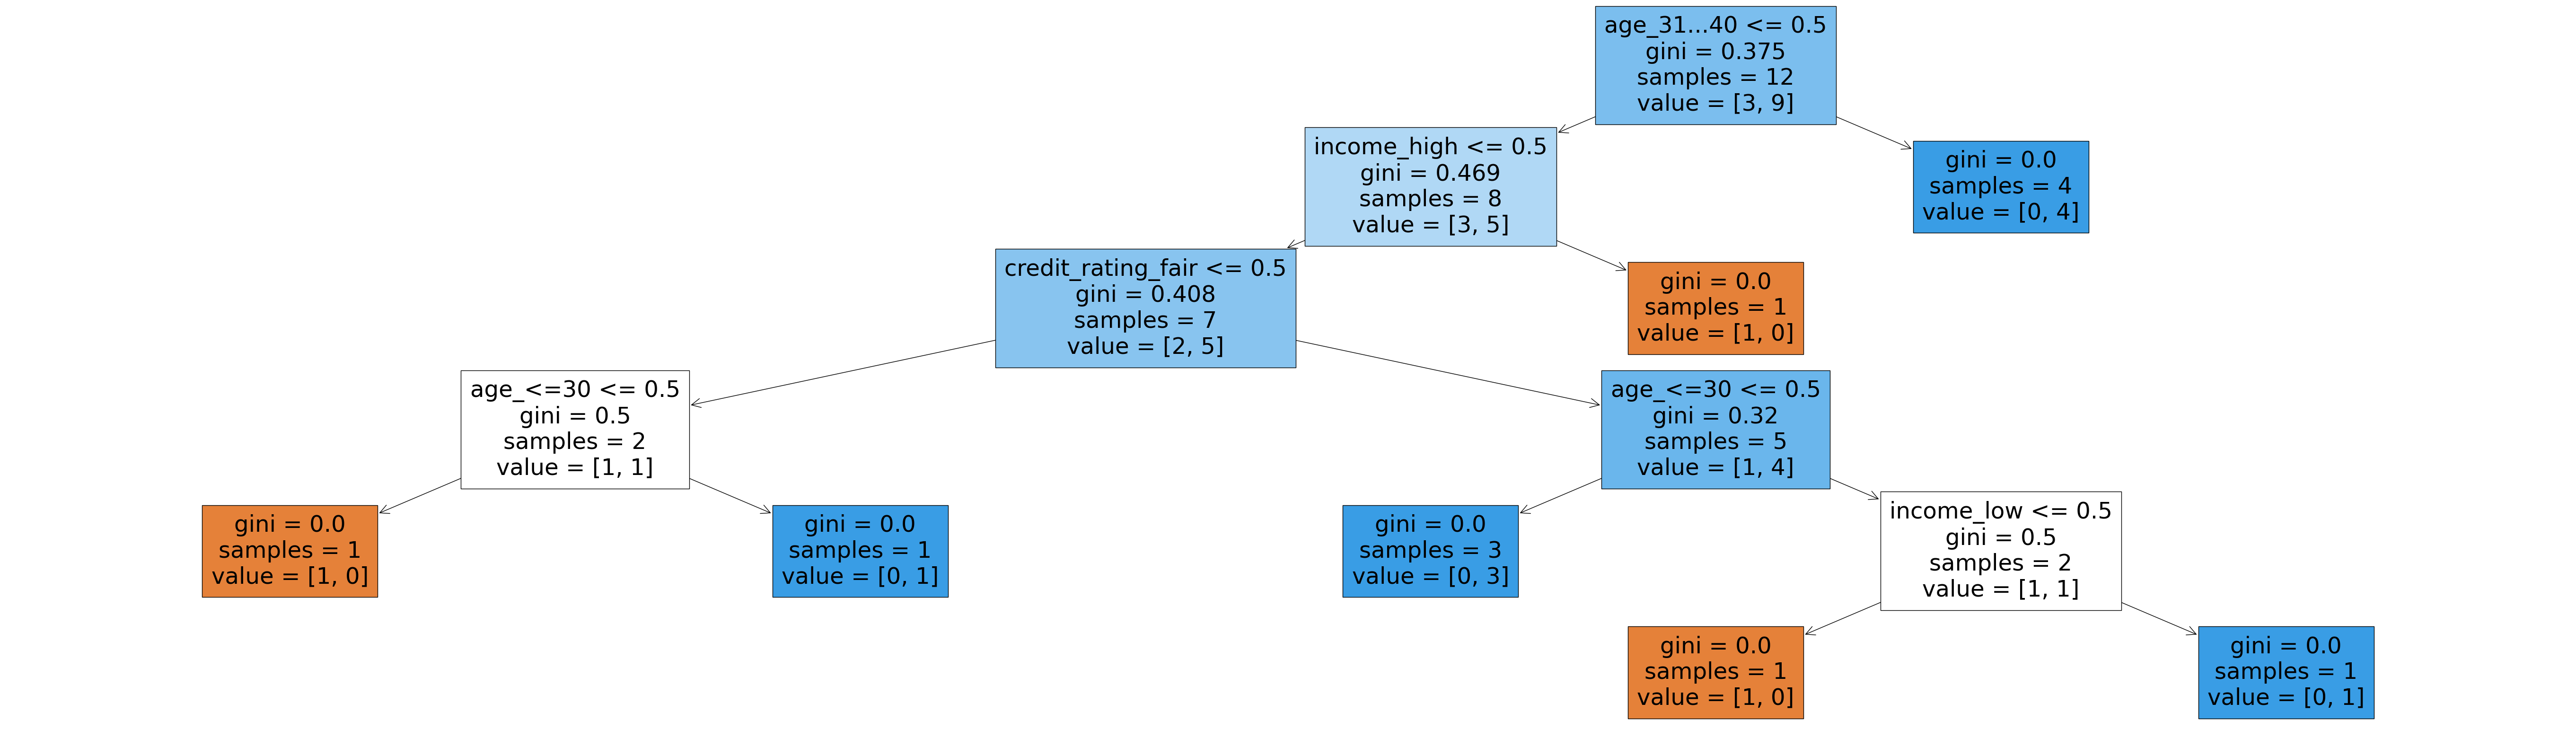

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=encoder.get_feature_names_out(input_features=Tr_X.columns))
plt.show()


In [19]:
model = DecisionTreeClassifier(random_state=42)
model.fit(Tr_X, Tr_y)
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", training_accuracy)
test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy:", test_accuracy)
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True)
plt.show()

C:\Users\Hp\Documents\anaconda new\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: '<=30'

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
dff=pd.read_excel("embeddingdata.xlsx")
model = DecisionTreeClassifier()
binary_df = dff[dff['Label'].isin([0, 1])]
X = binary_df[['embed_1', 'embed_2']]
y = binary_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")


Training Set Accuracy: 1.0
Test Set Accuracy: 0.5737704918032787


Training Set Accuracy (max_depth=5): 0.7206572769953051
Test Set Accuracy (max_depth=5): 0.6010928961748634


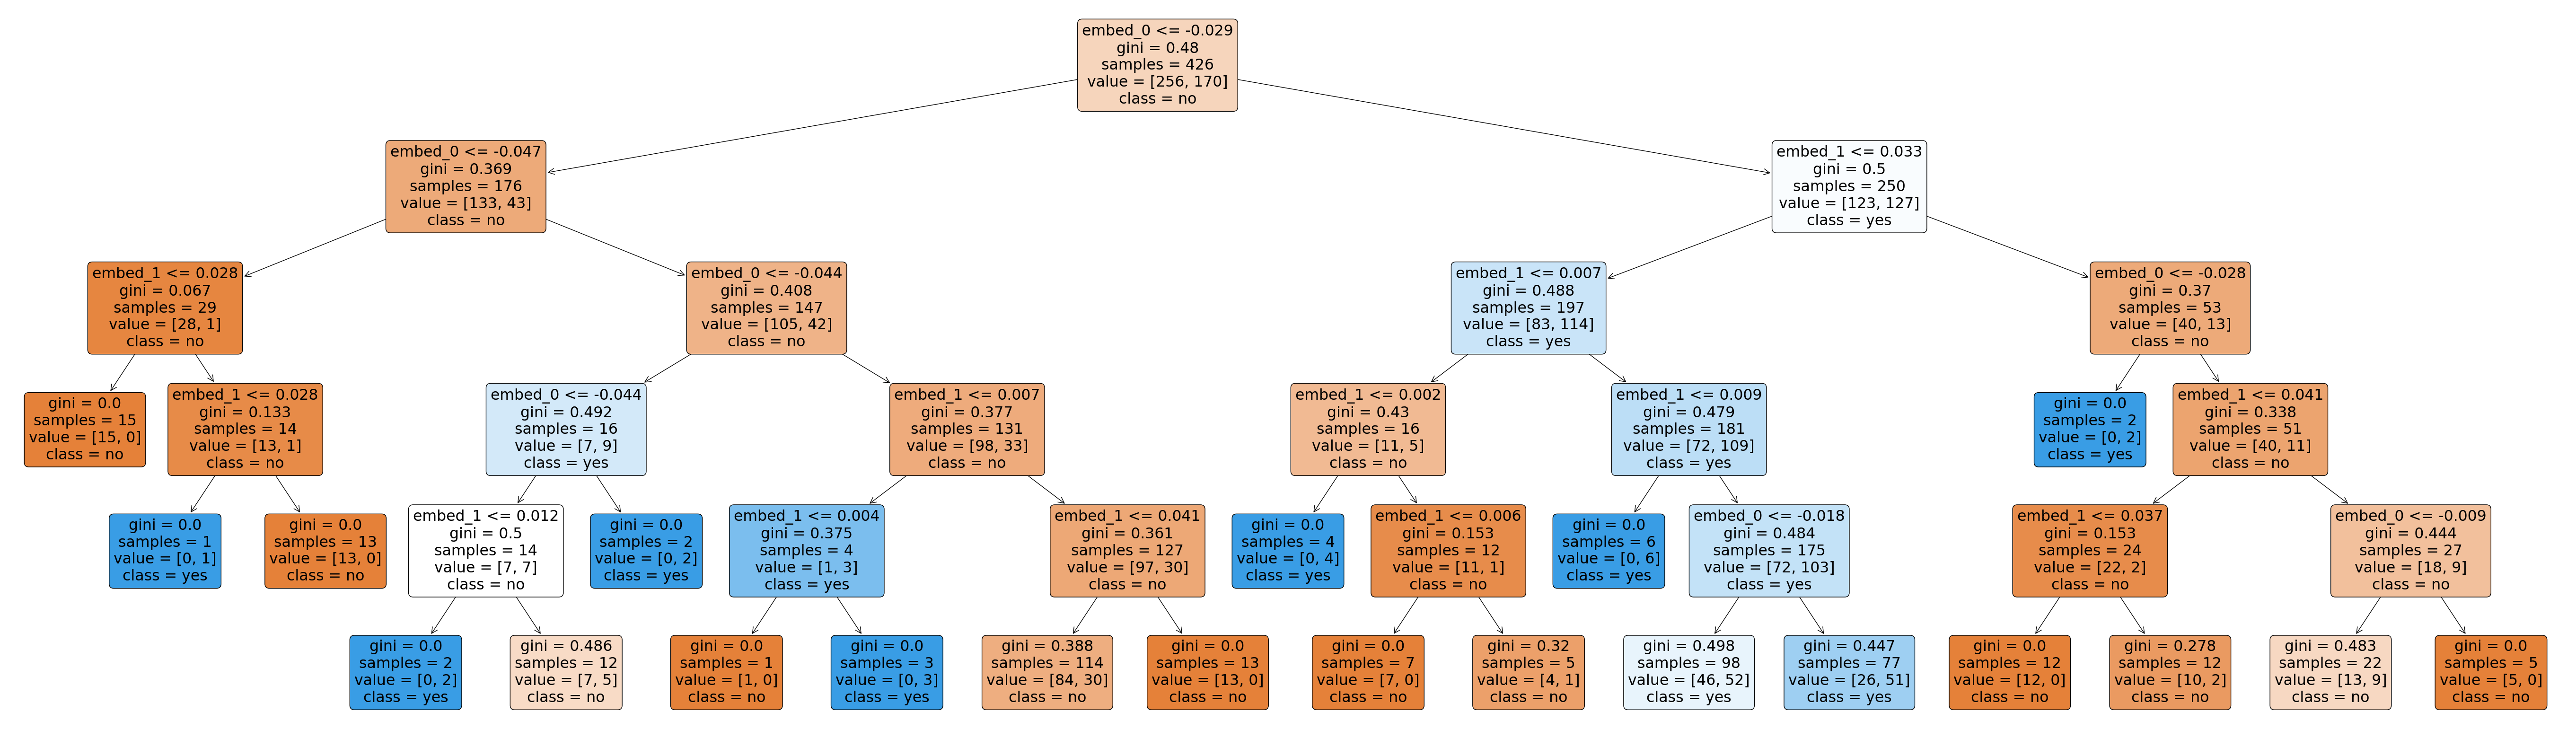

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
model = DecisionTreeClassifier(max_depth=5)
binary_df = dff[dff['Label'].isin([0, 1])]
X = binary_df[['embed_1', 'embed_2']]
y = binary_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
# Calculating training set accuracy
train_accuracy = model.score(X_train, y_train)
# Calculating test set accuracy
test_accuracy = model.score(X_test, y_test)
print(f"Training Set Accuracy (max_depth=5): {train_accuracy}")
print(f"Test Set Accuracy (max_depth=5): {test_accuracy}")
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=['embed_0', 'embed_1'], class_names=['no', 'yes'], rounded=True)
plt.show()
